 # Week 5: Exercise 5.2
 File: RattanavilayThip_Exercise_5.2.py (.ipynb)<br>
 Name: Thip Rattanavilay<br>
 Date: 1/16/2021<br>
 Course: DSC 530 Data Exploration and Analysis<br>
 Assignment: Chapter 5: 5.1, 5.2 & Chapter 6: 6.1

In [1]:
import numpy as np
import scipy.stats
import density
import hinc
import thinkplot
import thinkstats2


 ## Chapter 5

 ### Exercise 5.1
 In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

 In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

In [2]:
"""
men: mean = 178, std_dev = 7.7
woman: mean = 163, amd std_Dev = 7.3
"""
men_mean = 178
men_std_dev = 7.7

# determine the normal dist from scipy.stats
men_dist = scipy.stats.norm(loc=men_mean, scale=men_std_dev)


In [3]:
# calculate the % of men in the 5'10 to 6'1" range
low_height = 177.8 # cm 
high_height = 185.42 # cm

low_range = men_dist.cdf(low_height)
high_range = men_dist.cdf(high_height)

print("{:.2f} percent of men fall intro the 5'10 - 6'1 range".format((high_range - low_range)*100))


34.27 percent of men fall intro the 5'10 - 6'1 range


 ### Exercise 5.2
 To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

 Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

 `scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [4]:
# determine the pateto dist from scipy.stats with the given parameters
xm = 1
alpha = 1.7
height_dist = scipy.stats.pareto(b=alpha, scale=xm) 


In [5]:
# find the mean height from the pareto dist
print("The mean height is: {:.2f} m".format(height_dist.mean()))


The mean height is: 2.43 m


In [6]:
# Fraction of the population shorter than the mean.

# get the cdf of the mean
shorter_frac = height_dist.cdf(height_dist.mean())
print("The fraction of people shorter than the mean is: {:.2f}".format(shorter_frac))


The fraction of people shorter than the mean is: 0.78


In [7]:
# How many people do you expect to be taller than 1km?
"""
x = 1000 (1km)
amt_ppl = 7e9 (7 billion)
use the sf (survival function or 1-cdf) to predict amout of ppl expect to be taller than
1km
"""
x = 1000
amt_ppl = 7e9
expected = height_dist.sf(x) * amt_ppl

print("You would expect {:.0f} people to be over 1km.".format(expected))


You would expect 55603 people to be over 1km.


In [8]:
# How tall do we expect the tallest person to be?

# search for an x value that results in the sf dunction to be close to 1.
# some trial and error
result = round(height_dist.sf(617000) * amt_ppl, 1)

print("We would expect the tallest person to be: ~617 km.")


We would expect the tallest person to be: ~617 km.


 ## Chapter 6

 ### Exercise 6.1
 The distribution of income is famously skewed to the right. In this exercise, we'll measure how strong that skew is.
 Compute the median, mean, skewness and Pearson’s skewness of the resulting sample.
 What fraction of households reports a taxable income below the mean?
 How do the results depend on the assumed upper bound?

In [9]:
# read in the 'hinc06.csv' file, default file in hinc)
df = hinc.ReadData()
df.head()


,income,freq,cumsum,ps
0,4999.0,4204,4204,0.034330
1,9999.0,4729,8933,0.072947
2,14999.0,6982,15915,0.129963
3,19999.0,7157,23072,0.188407
4,24999.0,7131,30203,0.246640


In [10]:
""" Modified from hinc2 due to errors when setting values
"""
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    #df.log_lower[0] = 3.0  # MODIFIED #
    df.at[0, "log_lower"] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    #df.log_upper[41] = log_upper # MODIFIED #
    df.at[41, "log_upper"] = log_upper

    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


mean 74278.7075311872
std 93946.92996347835
median 51226.45447894046
skewness 4.949920244429583
pearson skewness 0.7361258019141782


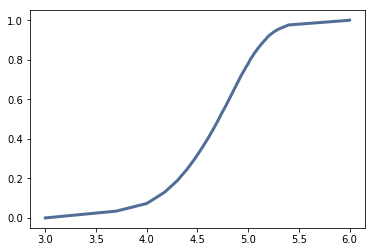

In [12]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)

# get a sample to calc mean, median
sample = np.power(10, log_sample)

mean, median = density.Summarize(sample)

#print("The mean is: {}".format(mean))
#print("The median is: {}".format(median))


In [13]:
# fraction of households below the mean
cdf = thinkstats2.Cdf(sample)
print('The fraction of households below the mean: {:.2f}'.format(cdf[mean]))


The fraction of households below the mean: 0.66


How do the results change with the upper bound? 

The upper bound effects the skewness. As the upper bound increases the moment-based skewness would also increase. The mean is only somewhat affected by an increase in the upper bound. Since the standard deviation is in the denominator it will have a strong effect on the results.